In [ ]:


import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'handwriting-recognition:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F818027%2F1400106%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240214%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240214T124740Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D53aa680d1beb1cc70f65276f2f88a917b69d1f95cac61ce851a8d52bbd9e15f4454982b540c24e101138fcf8ef3dbb5dc3deddd142837d48478aeb63698b42ac7bfefc5f0df069ff25d27f2f725b132fb8ce089ed28fae7e081df81dfb2d58118c46c3678fbc019846695ae821340ed24598d574263721b155a0f4ad950d6efca76d746897c7a90a9fbf6d2567984663abecb0243e478d60606eb3183a3131be6e55eab9a97b719eb910569bc139c6d37bbfd2dccf0ff26433a7829dab976faa8aeaf1514bff2ac457289550f7359ce7eee035790a303626a02f66c8e3aedb3e43cec26a9a120f7f3a395200fcedfcbdb57006a37148e192dac0a19efbb11ba2'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 1353071625 bytes downloaded
Downloaded and uncompressed: handwriting-recognition
Data source import complete.


In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



Streaming output truncated to the last 5000 lines.
/kaggle/input/handwriting-recognition/validation_v2/validation/VALIDATION_2895.jpg
/kaggle/input/handwriting-recognition/validation_v2/validation/VALIDATION_13872.jpg
/kaggle/input/handwriting-recognition/validation_v2/validation/VALIDATION_6146.jpg
/kaggle/input/handwriting-recognition/validation_v2/validation/VALIDATION_32285.jpg
/kaggle/input/handwriting-recognition/validation_v2/validation/VALIDATION_30477.jpg
/kaggle/input/handwriting-recognition/validation_v2/validation/VALIDATION_9548.jpg
/kaggle/input/handwriting-recognition/validation_v2/validation/VALIDATION_5531.jpg
/kaggle/input/handwriting-recognition/validation_v2/validation/VALIDATION_0814.jpg
/kaggle/input/handwriting-recognition/validation_v2/validation/VALIDATION_12792.jpg
/kaggle/input/handwriting-recognition/validation_v2/validation/VALIDATION_2069.jpg
/kaggle/input/handwriting-recognition/validation_v2/validation/VALIDATION_23968.jpg
/kaggle/input/handwriting-recog

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
/kaggle/input/handwriting-recognition/train_v2/train/TRAIN_48911.jpg
/kaggle/input/handwriting-recognition/train_v2/train/TRAIN_266141.jpg
/kaggle/input/handwriting-recognition/train_v2/train/TRAIN_72069.jpg
/kaggle/input/handwriting-recognition/train_v2/train/TRAIN_166538.jpg
/kaggle/input/handwriting-recognition/train_v2/train/TRAIN_43662.jpg
/kaggle/input/handwriting-recognition/train_v2/train/TRAIN_104329.jpg
/kaggle/input/handwriting-recognition/train_v2/train/TRAIN_33279.jpg
/kaggle/input/handwriting-recognition/train_v2/train/TRAIN_265981.jpg
/kaggle/input/handwriting-recognition/train_v2/train/TRAIN_22530.jpg
/kaggle/input/handwriting-recognition/train_v2/train/TRAIN_186964.jpg
/kaggle/input/handwriting-recognition/train_v2/train/TRAIN_180513.jpg
/kaggle/input/handwriting-recognition/train_v2/train/TRAIN_43223.jpg
/kaggle/input/handwriting-recognition/train_v2/train/TRAIN_320554.jpg
/kaggle/input/handwriting-recognition/train_v

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
/kaggle/input/handwriting-recognition/train_v2/train/TRAIN_218223.jpg
/kaggle/input/handwriting-recognition/train_v2/train/TRAIN_306362.jpg
/kaggle/input/handwriting-recognition/train_v2/train/TRAIN_208308.jpg
/kaggle/input/handwriting-recognition/train_v2/train/TRAIN_229497.jpg
/kaggle/input/handwriting-recognition/train_v2/train/TRAIN_15946.jpg
/kaggle/input/handwriting-recognition/train_v2/train/TRAIN_326416.jpg
/kaggle/input/handwriting-recognition/train_v2/train/TRAIN_328339.jpg
/kaggle/input/handwriting-recognition/train_v2/train/TRAIN_224465.jpg
/kaggle/input/handwriting-recognition/train_v2/train/TRAIN_330102.jpg
/kaggle/input/handwriting-recognition/train_v2/train/TRAIN_180422.jpg
/kaggle/input/handwriting-recognition/train_v2/train/TRAIN_34671.jpg
/kaggle/input/handwriting-recognition/train_v2/train/TRAIN_307865.jpg
/kaggle/input/handwriting-recognition/train_v2/train/TRAIN_209183.jpg
/kaggle/input/handwriting-recognition/tra

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
/kaggle/input/handwriting-recognition/train_v2/train/TRAIN_223861.jpg
/kaggle/input/handwriting-recognition/train_v2/train/TRAIN_312757.jpg
/kaggle/input/handwriting-recognition/train_v2/train/TRAIN_05253.jpg
/kaggle/input/handwriting-recognition/train_v2/train/TRAIN_244223.jpg
/kaggle/input/handwriting-recognition/train_v2/train/TRAIN_287116.jpg
/kaggle/input/handwriting-recognition/train_v2/train/TRAIN_267610.jpg
/kaggle/input/handwriting-recognition/train_v2/train/TRAIN_315540.jpg
/kaggle/input/handwriting-recognition/train_v2/train/TRAIN_30628.jpg
/kaggle/input/handwriting-recognition/train_v2/train/TRAIN_145277.jpg
/kaggle/input/handwriting-recognition/train_v2/train/TRAIN_295822.jpg
/kaggle/input/handwriting-recognition/train_v2/train/TRAIN_231352.jpg
/kaggle/input/handwriting-recognition/train_v2/train/TRAIN_293955.jpg
/kaggle/input/handwriting-recognition/train_v2/train/TRAIN_19882.jpg
/kaggle/input/handwriting-recognition/trai

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
/kaggle/input/handwriting-recognition/test_v2/test/TEST_11314.jpg
/kaggle/input/handwriting-recognition/test_v2/test/TEST_0305.jpg
/kaggle/input/handwriting-recognition/test_v2/test/TEST_13712.jpg
/kaggle/input/handwriting-recognition/test_v2/test/TEST_7682.jpg
/kaggle/input/handwriting-recognition/test_v2/test/TEST_29335.jpg
/kaggle/input/handwriting-recognition/test_v2/test/TEST_8298.jpg
/kaggle/input/handwriting-recognition/test_v2/test/TEST_7012.jpg
/kaggle/input/handwriting-recognition/test_v2/test/TEST_1429.jpg
/kaggle/input/handwriting-recognition/test_v2/test/TEST_13460.jpg
/kaggle/input/handwriting-recognition/test_v2/test/TEST_25097.jpg
/kaggle/input/handwriting-recognition/test_v2/test/TEST_37256.jpg
/kaggle/input/handwriting-recognition/test_v2/test/TEST_26350.jpg
/kaggle/input/handwriting-recognition/test_v2/test/TEST_34457.jpg
/kaggle/input/handwriting-recognition/test_v2/test/TEST_7736.jpg
/kaggle/input/handwriting-recog

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
/kaggle/input/handwriting-recognition/test_v2/test/TEST_36138.jpg
/kaggle/input/handwriting-recognition/test_v2/test/TEST_38081.jpg
/kaggle/input/handwriting-recognition/test_v2/test/TEST_9916.jpg
/kaggle/input/handwriting-recognition/test_v2/test/TEST_27753.jpg
/kaggle/input/handwriting-recognition/test_v2/test/TEST_29978.jpg
/kaggle/input/handwriting-recognition/test_v2/test/TEST_9727.jpg
/kaggle/input/handwriting-recognition/test_v2/test/TEST_30141.jpg
/kaggle/input/handwriting-recognition/test_v2/test/TEST_34334.jpg
/kaggle/input/handwriting-recognition/test_v2/test/TEST_32307.jpg
/kaggle/input/handwriting-recognition/test_v2/test/TEST_28296.jpg
/kaggle/input/handwriting-recognition/test_v2/test/TEST_15739.jpg
/kaggle/input/handwriting-recognition/test_v2/test/TEST_11749.jpg
/kaggle/input/handwriting-recognition/test_v2/test/TEST_35369.jpg
/kaggle/input/handwriting-recognition/test_v2/test/TEST_11084.jpg
/kaggle/input/handwriting-r

# Import Libraries

In [ ]:
import requests
from PIL import Image
import os
import torch
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
import matplotlib.pyplot as plt
import numpy as np

# Load Data

In [ ]:
MODEL_NAME = "microsoft/trocr-base-handwritten"
processor = TrOCRProcessor.from_pretrained(MODEL_NAME)
model = VisionEncoderDecoderModel.from_pretrained(MODEL_NAME)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/228 [00:00<?, ?B/s]

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


tokenizer_config.json:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.17k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

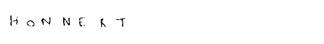

In [ ]:
test_image = '/kaggle/input/handwriting-recognition/train_v2/train/TRAIN_00014.jpg'
image = Image.open(test_image).convert('RGB')
image

# Handwritten Detection

In [ ]:
inputs = processor(image, return_tensors="pt").pixel_values
generated_ids = model.generate(inputs)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
print(generated_text)

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


HONNER T.


In [ ]:
root_dir = '/kaggle/input/handwriting-recognition/test_v2/test/'
image_paths = os.listdir(root_dir)[:250]
len(image_paths)

250

In [ ]:
images = np.array(image_paths)

In [ ]:
def visualize_df(df: np.ndarray):
    fig, axes = plt.subplots(4, 4, figsize=(12, 12))
    np.random.shuffle(df)
    for i, ax in enumerate(axes.ravel()):
        if i < len(df):
            img_path = df[i]
            image = Image.open(root_dir + img_path).convert('RGB')
            inputs = processor(image, return_tensors="pt").pixel_values
            generated_ids = model.generate(inputs)
            generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
            ax.imshow(image)
            ax.set_title(generated_text)
            ax.axis('off')

        else:
            ax.axis('off')

    plt.tight_layout()
    plt.show()

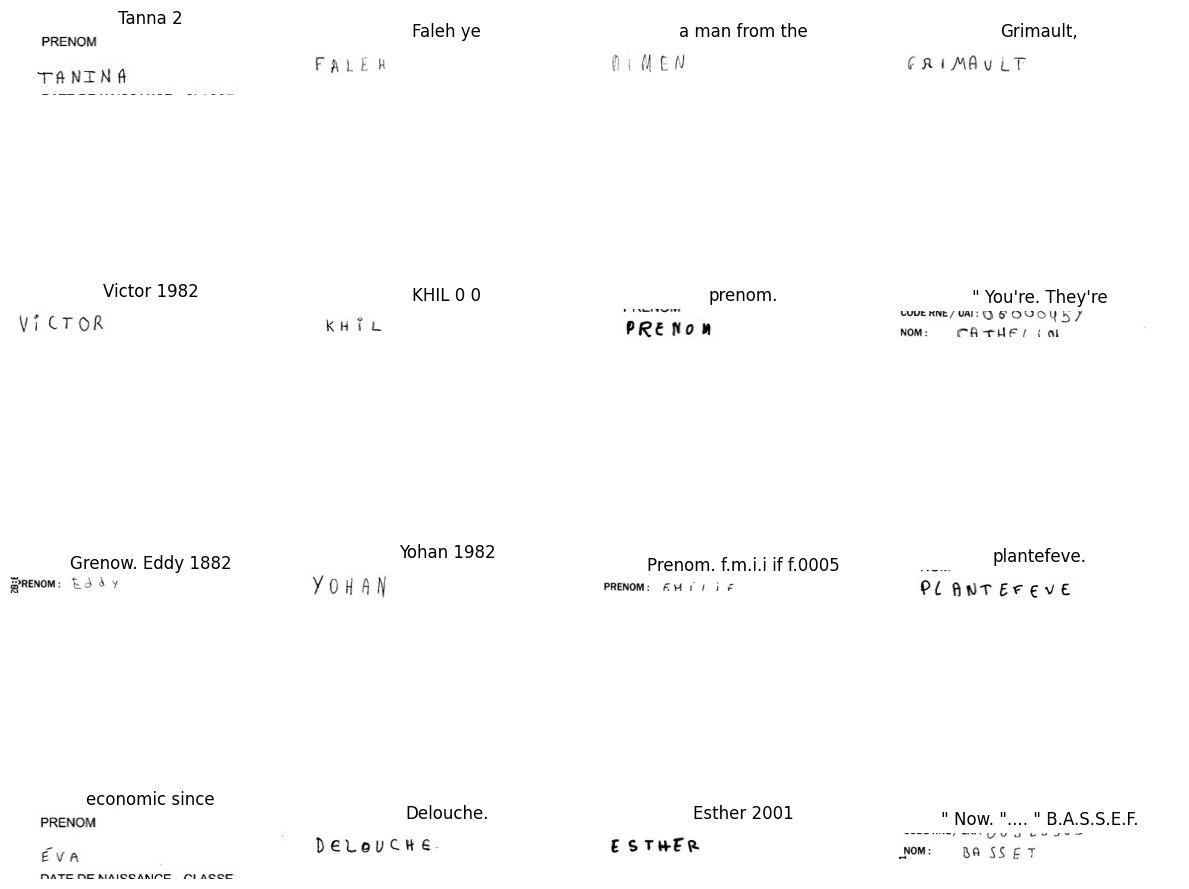

In [ ]:
visualize_df(images)